In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [4]:
from google.colab import files
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [6]:
data=pd.read_csv('50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#EDA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [20]:
#Renaming column names:
newdata=data.rename({'R&D Spend':'RDS', 'Administration':'ADMIN', 'Marketing Spend':'MKTS'}, axis=1)
newdata

,RDS,ADMIN,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [21]:
print(newdata.duplicated().sum())

0


In [22]:
newdata.describe()

,RDS,ADMIN,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


#Correlation Analysis

In [23]:
newdata.corr()

,RDS,ADMIN,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


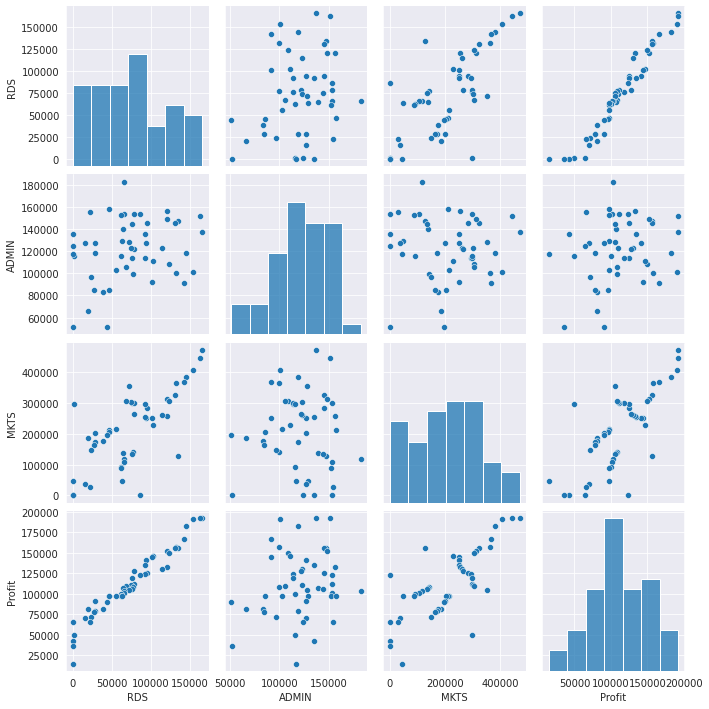

In [24]:
sns.set_style(style='darkgrid')
sns.pairplot(newdata)

#Model Building

In [25]:
model=smf.ols('Profit~RDS+ADMIN+MKTS', data=newdata).fit()

#Model Testing

In [27]:
#Finding coefficient parameters
model.params

Intercept    50122.192990
RDS              0.805715
ADMIN           -0.026816
MKTS             0.027228
dtype: float64

In [28]:
#Finding Tvalues and Pvalues
model.tvalues, np.round(model.pvalues, 5)

(Intercept     7.626218
 RDS          17.846374
 ADMIN        -0.525507
 MKTS          1.655077
 dtype: float64, Intercept    0.00000
 RDS          0.00000
 ADMIN        0.60176
 MKTS         0.10472
 dtype: float64)

In [30]:
#Finding Rsquared values
model.rsquared, model.rsquared_adj  #Model accuracy is 94.75%

(0.9507459940683246, 0.9475337762901719)

In [31]:
#Build SLR and MLR models for insignificant variables 'ADMIN' and 'MKTS'
#Also, find their t and P values

In [32]:
slr_a=smf.ols('Profit~ADMIN', data=newdata).fit()

In [33]:
slr_a.tvalues, slr_a.pvalues #ADMIN has insignificant pvalue

(Intercept    3.040044
 ADMIN        1.419493
 dtype: float64, Intercept    0.003824
 ADMIN        0.162217
 dtype: float64)

In [35]:
slr_m=smf.ols('Profit~MKTS', data=newdata).fit()
slr_m.tvalues, slr_m.pvalues #MKTS has significant pvalue

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64, Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [36]:
mlr_am=smf.ols('Profit~ADMIN+MKTS', data=newdata).fit()
mlr_am.tvalues, mlr_am.pvalues #P value is significant

(Intercept    1.142741
 ADMIN        2.467779
 MKTS         8.281039
 dtype: float64, Intercept    2.589341e-01
 ADMIN        1.729198e-02
 MKTS         9.727245e-11
 dtype: float64)

#Model Validation

#Two methods:
#Collinearity check & Residual Analysis

In [39]:
#Collinearity check
#Calculate VIF = 1/(1-Rsquared) for all independent variables
rsq_r=smf.ols('RDS~ADMIN+MKTS', data=newdata).fit().rsquared
vif_r=1/(1-rsq_r)
rsq_a=smf.ols('ADMIN~RDS+MKTS', data=newdata).fit().rsquared
vif_a=1/(1-rsq_a)
rsq_m=smf.ols('MKTS~RDS+ADMIN', data=newdata).fit().rsquared
vif_m=1/(1-rsq_m)

#putting the values in dataframe format
d1={'Variables':['RDS', "ADMIN", 'MKTS'], 'Vif':[vif_r, vif_a, vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMIN,1.175091
2,MKTS,2.326773


In [40]:
#As none of the variable value is above 20 (VIF>20), No collinearity, Hence we have to consider all variable i regression equation.

In [41]:
#Residual Analysis
#Test for normality of Residuality (Q-Q plot) using Residual model

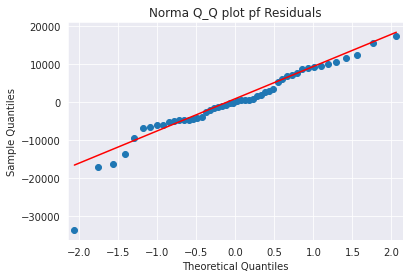

In [43]:
sm.qqplot(model.resid, line='q')
plt.title('Norma Q_Q plot pf Residuals')
plt.show()

In [44]:
list(np.where(model.resid<-30000))

[array([49])]

In [45]:
#Test for Homoscedasticity or Heteroscedasticity
def standard_values(vals): return (vals-vals.mean())/vals.std()

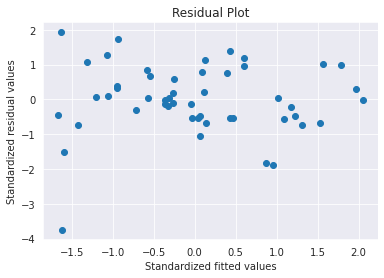

In [46]:
plt.scatter(standard_values(model.fittedvalues), standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [47]:
#Test for errors
#Using residual regression plots code graphics.plot_regress_exog(model,'x', fig)

eval_env: 1


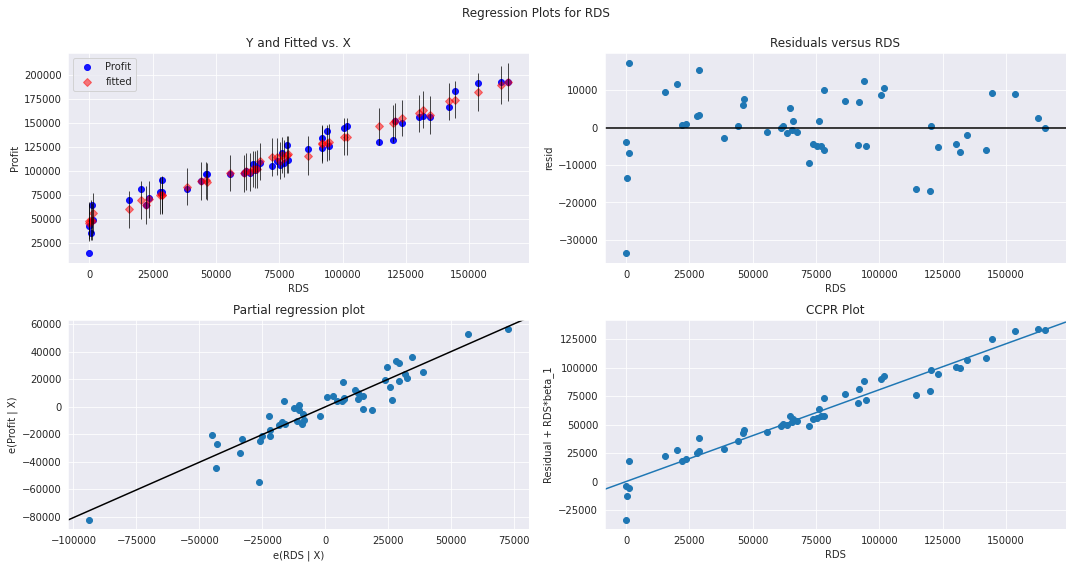

In [48]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'RDS', fig= fig)
plt.show()

eval_env: 1


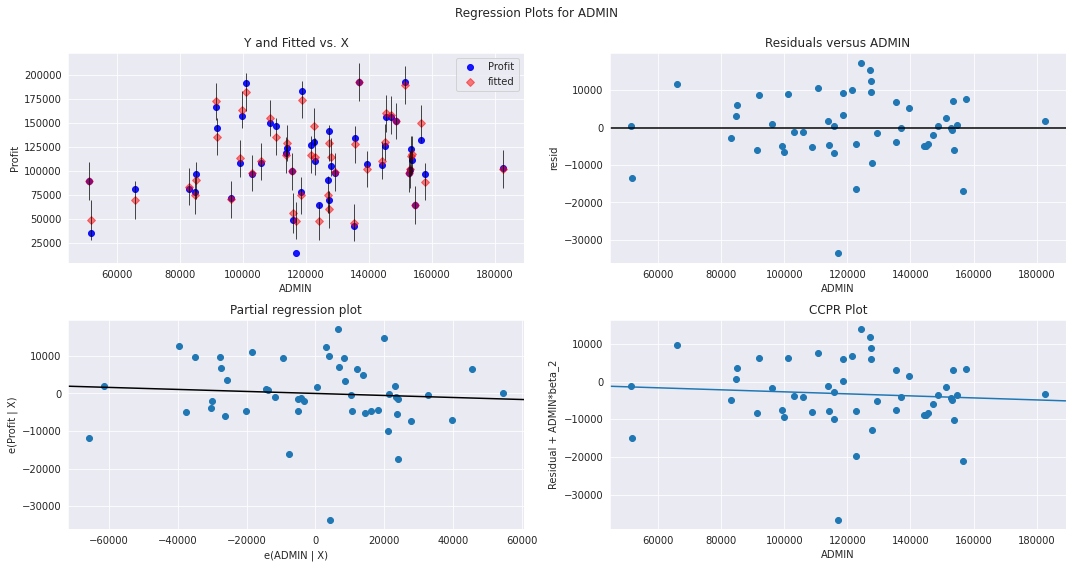

In [49]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'ADMIN', fig= fig)
plt.show()

eval_env: 1


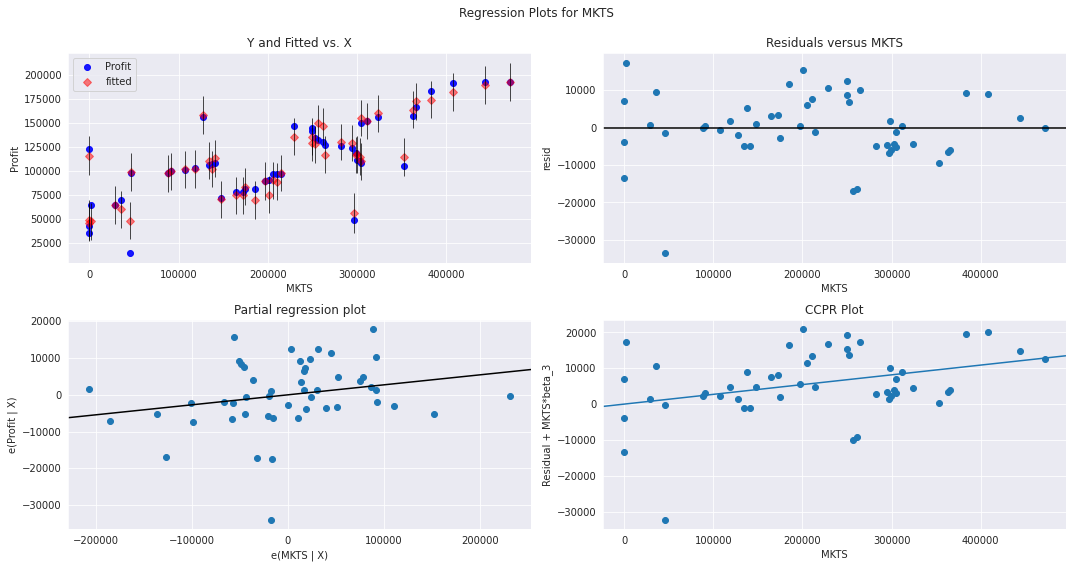

In [50]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'MKTS', fig= fig)
plt.show()

#Model Deletion Diagnostics
#Two Methods
Cooks Distance & leverage value

In [52]:
#Cooks distance, if Cooks distance > 1, then it is an outliner
(c,_)= model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

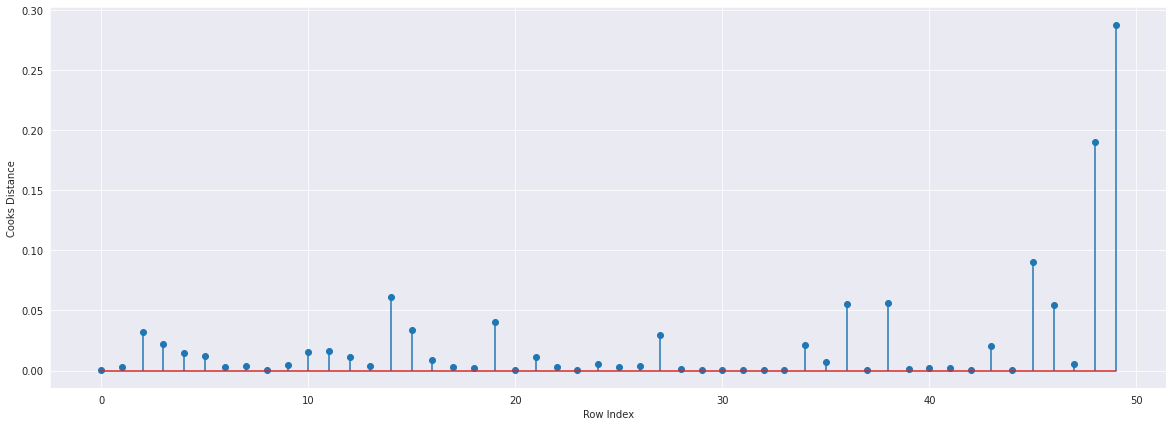

In [53]:
#plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(newdata)), np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [54]:
#Index and value of influencers where c>0.5
np.argmax(c), np.max(c)

(49, 0.2880822927543272)

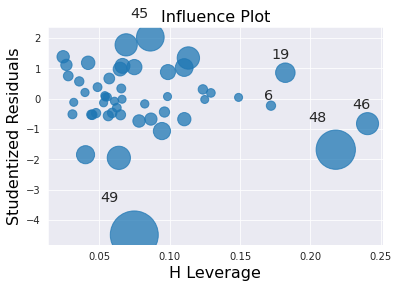

In [55]:
#Leverage values using high Influence points: Points which are beyond Leverage_cutoff are called as influencers
influence_plot(model)
plt.show()

In [57]:
# Leverage cutoff value = 3* (K+1)/n ; k= no. of features/columns & n = no. of data points 
k=newdata.shape[1]
n=newdata.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [58]:
newdata[newdata.index.isin([49])]

,RDS,ADMIN,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


#Improving the model

In [60]:
#Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
freshdata=newdata.drop(newdata.index[[49]], axis=0).reset_index(drop=True)
freshdata

,RDS,ADMIN,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#Model Deletion Diagnostics and Final Model

In [62]:
while np.max(c) > 0.5:
  model=smf.ols('Profit~RDS+ADMIN+MKTS', data=freshdata).fit()
  (c,_)=model.get_influence().cooks_distance
  c
  np.argmax(c), np.max(c)
  freshdata=freshdata.drop(freshdata.index[[np.argmax(c)]], axis=0).reset_index(drop=True)
  freshdata
else:
  final_model=smf.ols("Profit~RDS+ADMIN+MKTS", data=freshdata).fit()
  final_model.rsquared, final_model.aic
  print("Thus model accuracy is improved to", final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [63]:
final_model.rsquared

0.9613162435129847

In [64]:
freshdata

,RDS,ADMIN,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#Model Predictions

In [65]:
#Prediction values, RDS=70000, ADMIN= 90000, MKTS=140000
new_data=pd.DataFrame({'RDS':70000, 'ADMIN':90000, 'MKTS':140000}, index=[0])
new_data

,RDS,ADMIN,MKTS
0,70000,90000,140000


In [67]:
#Manual predication of price
final_model.predict(new_data)

0    108727.154753
dtype: float64

In [68]:
#Automatic predication with accuracy 90%
pred_y=final_model.predict(freshdata)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

#Table containing R^2 value for each prepared model

In [69]:
value={'prep_models':['model', 'final_model'], 'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(value)
table

,prep_models,Rsquared
0,model,0.950746
1,final_model,0.961316
